# Name: Soh Jian Min
# Admin Number: P2238856
# Class: EL/EP0302/FT
# Title: Assessing the Influence of Temperature and Rainfall on Air Quality
---
## Questions

1. What is the distribution of daily PSI values throughout the study period?

2. What is the proportion of days categorized into different air quality levels based on the PSI values?

3. How have wet bulb temperatures and monthly total rainfall fluctuated over the study period?

4. What are the yearly variations in air quality indicators, specifically the daily PSI and annual PM2.5 levels?

5. Do variations in wet bulb temperature and monthly rainfall correlate with changes in air quality, particularly the daily PSI?

6. How do environmental factors specifically wet bulb temperature correlate with particulate matter (PM2.5) levels, and how does this relationship vary across different years?

7. Do heavy rainfall events lead to improvements in air quality due to pollutant washout, as observed in yearly data?

8. How do air quality indices, particularly PSI, respond to rainfall and temperature change, is there any trend over the months throughout the years?


## Data Source
1. https://beta.data.gov.sg/datasets/d_b16d06b83473fdfcc92ed9d37b66ba58/view
2. https://beta.data.gov.sg/datasets/d_b4cf557f8750260d229c49fd768e11ed/view
3. https://beta.data.gov.sg/datasets/d_397fe8de643aea9927bdee32e49307ff/view
4. https://beta.data.gov.sg/datasets/d_f222c70a7c00c5a5a9d4ec432d67f6e8/view

## Load data from CSV files

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Importing Wet Bulb Temperature Hourly data
wet_bulb_temperature = np.genfromtxt("WetBulbTemperatureHourly.csv", dtype=[('wbt_date', 'U10'), ('wbt_time', 'i2'), ('wet_bulb_temperature', 'f4')], delimiter=",", names=True, encoding='utf-8')

# Importing Air Pollutant Particulate Matter PM2.5 data
air_pollutant_particulate_matter = np.genfromtxt("AirPollutantParticulateMatterPM2.5.csv", dtype=[('year', 'i2'), ('pm25_mean', 'i2')], delimiter=",", names=True, encoding='utf-8')

# Importing Historical 24-hour PSI data
historical_psi = np.genfromtxt("Historical24hrPSI.csv", dtype=[('24hr_psi', 'U20'), ('north', 'i2'), ('south', 'i2'), ('east', 'i2'), ('west', 'i2'), ('central', 'i2')], delimiter=",", names=True, encoding='utf-8')

# Importing Rainfall Monthly Total data
rainfall_monthly_number_of_rain_days = np.genfromtxt("RainfallMonthlyNumberofRainDays.csv", dtype=[('month', 'U10'), ('no_of_rainy_days', 'i2')], delimiter=",", names=True, encoding='utf-8')

# Cleaning Datasets

In [15]:
from datetime import datetime

def filter_data_by_year(data, year_column):
    # Filter to show only 2014-2022 data
    return data[np.array([2014 <= int(date.split("-")[0]) <= 2022 for date in data[year_column]])]

def convert_date_format(date_str, original_format, new_format='%Y-%m-%d', error_message="Failed to parse datetime"):
    if date_str == '2016-04-04 010:00:00': 
        return '2016-04-04'
    try:
        return datetime.strptime(date_str, original_format).strftime(new_format)
    except ValueError:
        print(f"{error_message}: {date_str}")
        return None

def aggregate_data_by_date(data, date_column, aggregation_columns):
    # Aggregate data by unique dates and compute average for specified columns where the dates is the same.
    unique_dates = np.unique(data[date_column][data[date_column] != None])
    aggregated_data = np.zeros(len(unique_dates), dtype=[(date_column, 'U10')] + [(col, 'f4') for col in aggregation_columns])
    aggregated_data[date_column] = unique_dates
    for date in unique_dates:
        # get the indexs of the rows where its date is the same as current looping date
        date_mask = data[date_column] == date
        for col in aggregation_columns:
            if np.any(date_mask):
                # replacing the data in the specified looping column where row is the current looping date with the mean of the data in the original data for the corresponding column where its date is the same as current looping date
                aggregated_data[col][aggregated_data[date_column] == date] = round(np.mean(data[col][date_mask]), 2)
    return aggregated_data

# Filtering data to only show 2014-2022 data
wet_bulb_temperature = filter_data_by_year(wet_bulb_temperature, 'wbt_date')
rainfall_monthly_number_of_rain_days = filter_data_by_year(rainfall_monthly_number_of_rain_days, 'month')
# Filtering Air Pollutant Particulate Matter PM2.5 data to only show 2014-2022 data
air_pollutant_particulate_matter = air_pollutant_particulate_matter[(air_pollutant_particulate_matter['year'] >= 2014) & (air_pollutant_particulate_matter['year'] <= 2022)]

# # Convert the dates to the standard format 'yyyy-mm' and put it back into wet_bulb_temperature['wbt_date']
# wet_bulb_temperature['wbt_date'] = np.array([convert_date_format(dt, '%Y-%m-%d') for dt in wet_bulb_temperature['wbt_date']])
# # Filter out any entries where date conversion failed
# wet_bulb_temperature = wet_bulb_temperature[wet_bulb_temperature['wbt_date'] != None]

# Convert the dates to the standard format 'yyyy-mm' and put it back into historical_psi['24hr_psi']
historical_psi['24hr_psi'] = np.array([convert_date_format(dt, '%d/%m/%Y %H:%M') for dt in historical_psi['24hr_psi']])
# Filter out any entries where date conversion failed
historical_psi = historical_psi[historical_psi['24hr_psi'] != None]

# Aggregating data by unique dates
wet_bulb_temperature = aggregate_data_by_date(wet_bulb_temperature, 'wbt_date', ['wet_bulb_temperature'])
historical_psi = aggregate_data_by_date(historical_psi, '24hr_psi', ['north', 'south', 'east', 'west', 'central'])


# Nature of the Datasets

### 1. Wet Bulb Temperature - Hourly Data
This dataset initially contained hourly temperature data which was too much for trend analysis which only requires monthly data. To simplify and focus on more significant temperature trends over time, the data was cleaned and aggregated to monthly averages. This transformation helps in identifying broader climatic patterns and planning for potential extreme weather events.

### 2. Air Pollutant - Particulate Matter PM2.5
The PM2.5 dataset offers annual snapshots of particulate matter concentrations, crucial for studying long-term air quality trends. Given the yearly aggregation, this data is good in identifying years with significantly poor air quality and do temperature or rainfall affect the air quality.

### 3. Historical 24-hr PSI
The Historical 24-hr PSI dataset captures monthly air quality indices across five geographical regions. The original daily data was voluminous and less impactful for identifying longer-term pollution trends, hence it was cleaned to provide a monthly aggregated view. This aids in pinpointing months with critical pollution levels and do temperature or rainfall affect the psi level.

### 4. Rainfall - Monthly Total Rainfall
Monthly rain day counts from this dataset are utilized to understand rainfall patterns better over months and years. Which could be used to analyse whether enviromental conditions affects air quality



# Nature and statistics of wet_bulb_temperature


In [81]:
# Total rows in the dataset
num_rows = len(wet_bulb_temperature)
print(f"Number of rows in the dataset: {num_rows}")
# Highest temperature in the dataset
max_temp = np.max(wet_bulb_temperature['wet_bulb_temperature'])
max_temp_month = wet_bulb_temperature[np.argmax(wet_bulb_temperature['wet_bulb_temperature'])]
print(f"The highest temperature was {max_temp}°C in {max_temp_month['wbt_date']}.")
# Mean of each month's temperature across the years
monthly_avg_temperatures = {}
for i in range(1, 13):
    month_str = f'{i:02d}'
    # Create a mask for the current month using the last two characters of the date string
    month_mask = np.array([date[-2:] == month_str for date in wet_bulb_temperature['wbt_date']])
    month_temps = wet_bulb_temperature['wet_bulb_temperature'][month_mask]
    if month_temps.size > 0:
        monthly_avg_temperatures[i-1] = np.mean(month_temps)
    else:
        monthly_avg_temperatures[i-1] = np.nan  # Handle possible missing data

# Display the monthly averages
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
print("Average temperatures for each month across all years:")
for month, temp in monthly_avg_temperatures.items():
    print(f"{month_names[month]}: {temp:.2f}°C")

# Find the month with the highest average temperature
highest_avg_month = max(monthly_avg_temperatures, key=monthly_avg_temperatures.get)
print(f"{month_names[highest_avg_month-1]} has the highest average temperature of {monthly_avg_temperatures[highest_avg_month]:.2f}°C across all years.")
print()
# Average temperature for each year from 2014 to 2022
yearly_avg_temperatures = {}
for year in range(2014, 2023):  # Loop through the years 2014 to 2022
    year_str = str(year)  # Convert year to string
    # Create a mask for the current year using the first four characters of the date string
    year_mask = np.array([date[:4] == year_str for date in wet_bulb_temperature['wbt_date']])
    year_temps = wet_bulb_temperature['wet_bulb_temperature'][year_mask]
    if year_temps.size > 0:
        yearly_avg_temperatures[year] = np.mean(year_temps)
    else:
        yearly_avg_temperatures[year] = np.nan  # Handle possible missing data

# Display the yearly averages
print("Average temperatures for each year:")
for year, temp in yearly_avg_temperatures.items():
    print(f"Year {year}: {temp:.2f}°C")

# Find the year with the highest and lowest average temperature
highest_avg_year = max(yearly_avg_temperatures, key=yearly_avg_temperatures.get)
lowest_avg_year = min(yearly_avg_temperatures, key=yearly_avg_temperatures.get)
print(f"Year {highest_avg_year} had the highest average temperature: {yearly_avg_temperatures[highest_avg_year]:.2f}°C.")
print(f"Year {lowest_avg_year} had the lowest average temperature: {yearly_avg_temperatures[lowest_avg_year]:.2f}°C.")

Number of rows in the dataset: 3287
The highest temperature was 27.729999542236328°C in 2019-05-07.
Average temperatures for each month across all years:
January: 25.01°C
February: 25.01°C
March: 25.07°C
April: 25.06°C
May: 25.12°C
June: 25.16°C
July: 25.14°C
August: 25.07°C
September: 25.13°C
October: 25.10°C
November: 25.07°C
December: 25.03°C
May has the highest average temperature of 25.16°C across all years.

Average temperatures for each year:
Year 2014: 24.96°C
Year 2015: 25.04°C
Year 2016: 25.05°C
Year 2017: 25.34°C
Year 2018: 25.08°C
Year 2019: 25.17°C
Year 2020: 25.05°C
Year 2021: 24.98°C
Year 2022: 24.98°C
Year 2017 had the highest average temperature: 25.34°C.
Year 2014 had the lowest average temperature: 24.96°C.


# Nature and statistics of air_pollutant_particulate_matter

In [5]:
# Total number of entries in the dataset
num_entries = len(air_pollutant_particulate_matter)
print(f"Number of entries in the dataset: {num_entries}")

# Calculate the average PM2.5 levels over all years
average_pm2_5 = np.mean(air_pollutant_particulate_matter['pm25_mean'])
print(f"Average PM2.5 level from year 2014-2022: {average_pm2_5:.2f} µg/m³")

# Find the year with the highest and lowest PM2.5 levels
highest_pm2_5_year = air_pollutant_particulate_matter[np.argmax(air_pollutant_particulate_matter['pm25_mean'])]
lowest_pm2_5_year = air_pollutant_particulate_matter[np.argmin(air_pollutant_particulate_matter['pm25_mean'])]

print(f"Year {highest_pm2_5_year['year']} had the highest PM2.5 level: {highest_pm2_5_year['pm25_mean']} µg/m³")
print(f"Year {lowest_pm2_5_year['year']} had the lowest PM2.5 level: {lowest_pm2_5_year['pm25_mean']} µg/m³")

Number of entries in the dataset: 9
Average PM2.5 level from year 2014-2022: 15.11 µg/m³
Year 2015 had the highest PM2.5 level: 24 µg/m³
Year 2020 had the lowest PM2.5 level: 11 µg/m³


# Nature and statistics of historical_psi

In [20]:
# Display basic statistics
num_entries = len(historical_psi)
print(f"Number of entries in the dataset: {num_entries}")

# Find the month with the highest average PSI for North
highest_psi = np.max(historical_psi['north'])
highest_psi_month = historical_psi['24hr_psi'][np.argmax(historical_psi['north'])]
print(f"Highest PSI was {highest_psi:.2f} in {highest_psi_month} for the North region.")

# Average PSI per month across all years
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_psi = {region: {month: None for month in month_names} for region in ['north', 'south', 'east', 'west', 'central']}
# Calculate average PSI for each month and region
for i, month in enumerate(month_names, start=1):
    month_str = f'{i:02d}'
    month_mask = np.array([date[-2:] == month_str for date in historical_psi['24hr_psi']])
    for region in monthly_avg_psi:
        month_psi = historical_psi[region][month_mask]
        if month_psi.size > 0:
            monthly_avg_psi[region][month] = np.mean(month_psi)
        else:
            monthly_avg_psi[region][month] = np.nan 

# Display the monthly averages for each region
for region, average_data in monthly_avg_psi.items():
    print()
    print(f"Average PSI for each month across all years for {region.capitalize()}:")
    for month, avg_psi in average_data.items():
        if avg_psi is not None:
            print(f"{month}: {avg_psi:.2f}")
        else:
            print(f"{month}: No data available")
    # End of loop for each month in region
    highest_avg_month = max(average_data, key=average_data.get)
    highest_avg_psi = average_data[highest_avg_month]
    if highest_avg_psi is not None:
        print(f"{highest_avg_month} has the highest average PSI of {highest_avg_psi:.2f} for {region.capitalize()} across all years.")
    else:
        print(f"No valid data to determine the highest average PSI for {region.capitalize()}.")

Number of entries in the dataset: 3198
Highest PSI was 263.33 in 2015-09-25 for the North region.

Average PSI for each month across all years for North:
January: 50.89
February: 50.19
March: 51.59
April: 50.40
May: 51.21
June: 51.94
July: 51.81
August: 50.15
September: 50.39
October: 50.60
November: 50.89
December: 50.62
June has the highest average PSI of 51.94 for North across all years.

Average PSI for each month across all years for South:
January: 49.80
February: 48.47
March: 50.22
April: 49.74
May: 50.99
June: 51.74
July: 51.01
August: 49.89
September: 50.52
October: 50.19
November: 49.66
December: 50.01
June has the highest average PSI of 51.74 for South across all years.

Average PSI for each month across all years for East:
January: 50.27
February: 49.40
March: 49.87
April: 49.08
May: 50.79
June: 51.66
July: 51.27
August: 49.66
September: 49.55
October: 50.01
November: 49.84
December: 49.64
June has the highest average PSI of 51.66 for East across all years.

Average PSI for

# Nature and statistics of rainfall_monthly_number_of_rain_days

In [24]:
# Total number of entries in the dataset
num_entries = len(rainfall_monthly_number_of_rain_days)
print(f"Number of entries in the dataset: {num_entries}")

# Calculate the average PM2.5 levels over all years
avg_number_of_rain_days = np.mean(rainfall_monthly_number_of_rain_days['no_of_rainy_days'])
print(f"Average Number of raindays from year 2014-2022: {avg_number_of_rain_days:.2f}")

# Find the year with the highest and lowest PM2.5 levels
highest_number_of_rain_days = rainfall_monthly_number_of_rain_days[np.argmax(rainfall_monthly_number_of_rain_days['no_of_rainy_days'])]
lowest_number_of_rain_days = rainfall_monthly_number_of_rain_days[np.argmin(rainfall_monthly_number_of_rain_days['no_of_rainy_days'])]

print(f"{highest_number_of_rain_days['month']} had the highest number of rain days: {highest_number_of_rain_days['no_of_rainy_days']}")
print(f"{lowest_number_of_rain_days['month']} had the lowest number of rain days: {lowest_number_of_rain_days['no_of_rainy_days']}")
print()
# Mean of each month's temperature across the years
monthly_avg_no_of_rain_days = {}
for i in range(1, 13):
    month_str = f'{i:02d}'
    # Create a mask for the current month using the last two characters of the date string
    month_mask = np.array([date[-2:] == month_str for date in rainfall_monthly_number_of_rain_days['month']])
    month_no_of_rain_days = rainfall_monthly_number_of_rain_days['no_of_rainy_days'][month_mask]
    if month_no_of_rain_days.size > 0:
        monthly_avg_no_of_rain_days[i-1] = np.mean(month_no_of_rain_days)
    else:
        monthly_avg_no_of_rain_days[i-1] = np.nan  # Handle possible missing data

# Display the monthly averages
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
print("Average no of rainy days for each month across all years:")
for month, no_of_rainy_days in monthly_avg_no_of_rain_days.items():
    print(f"{month_names[month]}: {no_of_rainy_days:.2f}")


Number of entries in the dataset: 108
Average Number of raindays from year 2014-2022: 14.24
2018-11 had the highest number of rain days: 27
2014-02 had the lowest number of rain days: 1

Average no of rainy days for each month across all years:
January: 12.56
February: 7.56
March: 9.67
April: 14.67
May: 14.44
June: 15.00
July: 13.89
August: 14.67
September: 12.67
October: 15.89
November: 21.11
December: 18.78


# Question 1: What is the distribution of daily PSI values throughout the study period?

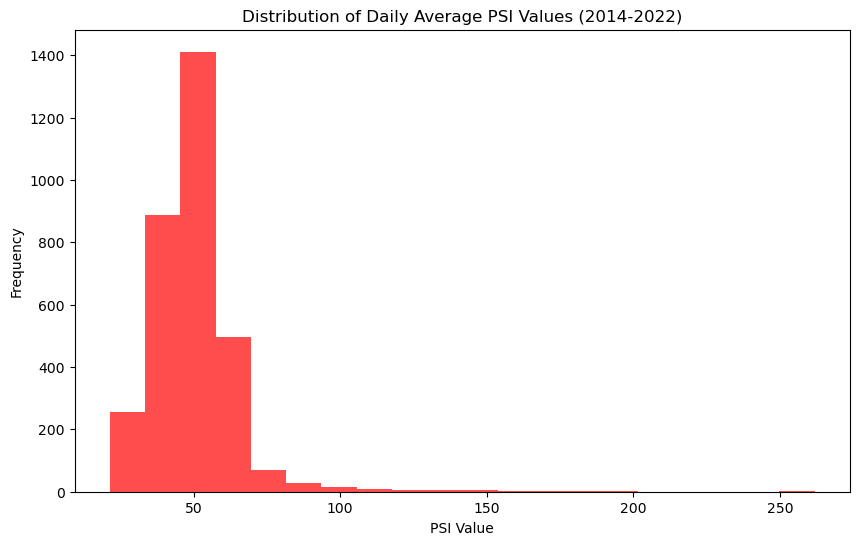

In [75]:
# Extract PSI values from the dataset
# Calculate daily average PSI values
daily_avg_psi = np.mean([historical_psi['north'], historical_psi['south'], historical_psi['east'], historical_psi['west'], historical_psi['central']], axis=0)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(daily_avg_psi, bins=20, color='red', alpha=0.7)
plt.title('Distribution of Daily Average PSI Values (2014-2022)')
plt.xlabel('PSI Value')
plt.ylabel('Frequency')
plt.show()

**Based on the distribution shown in the graph:**
1. The majority of daily average PSI values during the 2014-2022 period are clustered around 50. The histogram shows a very high frequency (peak) at the PSI value of around 50, indicating that most days had relatively low PSI readings in this range.

2. However, there is a smaller but notable number of days with higher PSI values as well. The distribution has a long tail extending towards higher PSI levels, with some values reaching above 100 and even a few instances above 250.

3. This distribution pattern suggests that while the air quality was generally good with low PSI values on most days, there were occasional periods or events that led to elevated PSI levels, indicating poorer air quality conditions.

Through this statistic I will continue investigating about the potential influence of weather factors like temperature and rainfall on these higher PSI instances.

# Question 2: What is the proportion of days categorized into different air quality levels based on the PSI values?

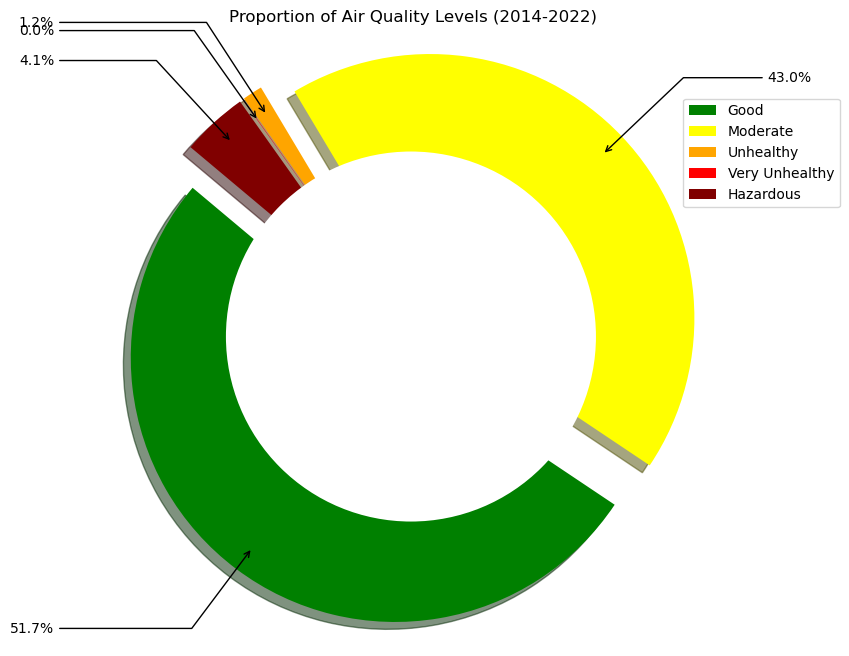

In [76]:
daily_avg_psi = np.mean([historical_psi['north'], historical_psi['south'], historical_psi['east'], historical_psi['west'], historical_psi['central']], axis=0)


categories = {'Good': 0, 'Moderate': 0, 'Unhealthy': 0, 'Very Unhealthy': 0, 'Hazardous': 0}
for avg_psi in daily_avg_psi:
    if avg_psi <= 50:
        categories['Good'] += 1
    elif 51 <= avg_psi <= 100:
        categories['Moderate'] += 1
    elif 101 <= avg_psi <= 200:
        categories['Unhealthy'] += 1
    elif 201 <= avg_psi <= 300:
        categories['Very Unhealthy'] += 1
    else:
        categories['Hazardous'] += 1

# Filter out categories with 0 counts
filtered_categories = {k: v for k, v in categories.items() if v > 0}

# Plot the pie chart
labels = filtered_categories.keys()
sizes = filtered_categories.values()
colors = ['green', 'yellow', 'orange', 'red', 'maroon']
explode = [0.1 if v > 0 else 0 for v in sizes]  # Explode non-zero slices to improve visibility

plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140,
                                   pctdistance=0.85)

# Draw circle for 'doughnut' effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add legend
plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(1.2, 0.9))

# Annotate with arrows for percentages
for i, (autotext, patch) in enumerate(zip(autotexts, patches)):
    angle = (patch.theta2 - patch.theta1) / 2. + patch.theta1
    x = patch.r * np.cos(np.deg2rad(angle))
    y = patch.r * np.sin(np.deg2rad(angle))
    horizontalalignment = {-1: 'right', 1: 'left'}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(angle)
    plt.annotate(autotext.get_text(), xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, arrowprops=dict(arrowstyle="->", connectionstyle=connectionstyle))
    autotext.set_text('')  # Remove original text to avoid duplication

plt.title('Proportion of Air Quality Levels (2014-2022)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


**Analysis of the pie chart depicting the proportion of air quality levels from 2014 to 2022:**

1. The majority of days (51.7%) experienced "Good" air quality levels, as indicated by the PSI values falling within the healthy range.

2. A significant portion (43.0%) of days had "Moderate" air quality, suggesting that while not ideal, the air quality was not severely degraded.

3. However, it is noteworthy that a non-negligible percentage of days (4.1%) were classified as "Unhealthy," and an additional 1.2% were categorized as "Very Unhealthy" in terms of air quality levels.

4. While these percentages for "Unhealthy" and "Very Unhealthy" levels may seem small, they represent instances where air pollution levels could have potentially harmful effects on public health and the environment.

5. Given the occurrence of days with elevated PSI values, it is crucial to investigate the role of environmental factors, such as temperature and rainfall patterns, in influencing air quality conditions.

Through this, I will continue examining the correlations between environment condition and the instances of unhealthy or hazardous air quality levels, valuable insights could be gained into the underlying drivers contributing to air pollution episodes. If there is relationship between weather conditions and air quality degradation found , we could predict and inform the development of strategies and policies to mitigate or manage air pollution events more effectively, ultimately safeguarding public health and environmental well-being.

# Question 3: How have wet bulb temperatures and monthly total rainfall fluctuated over the study period?

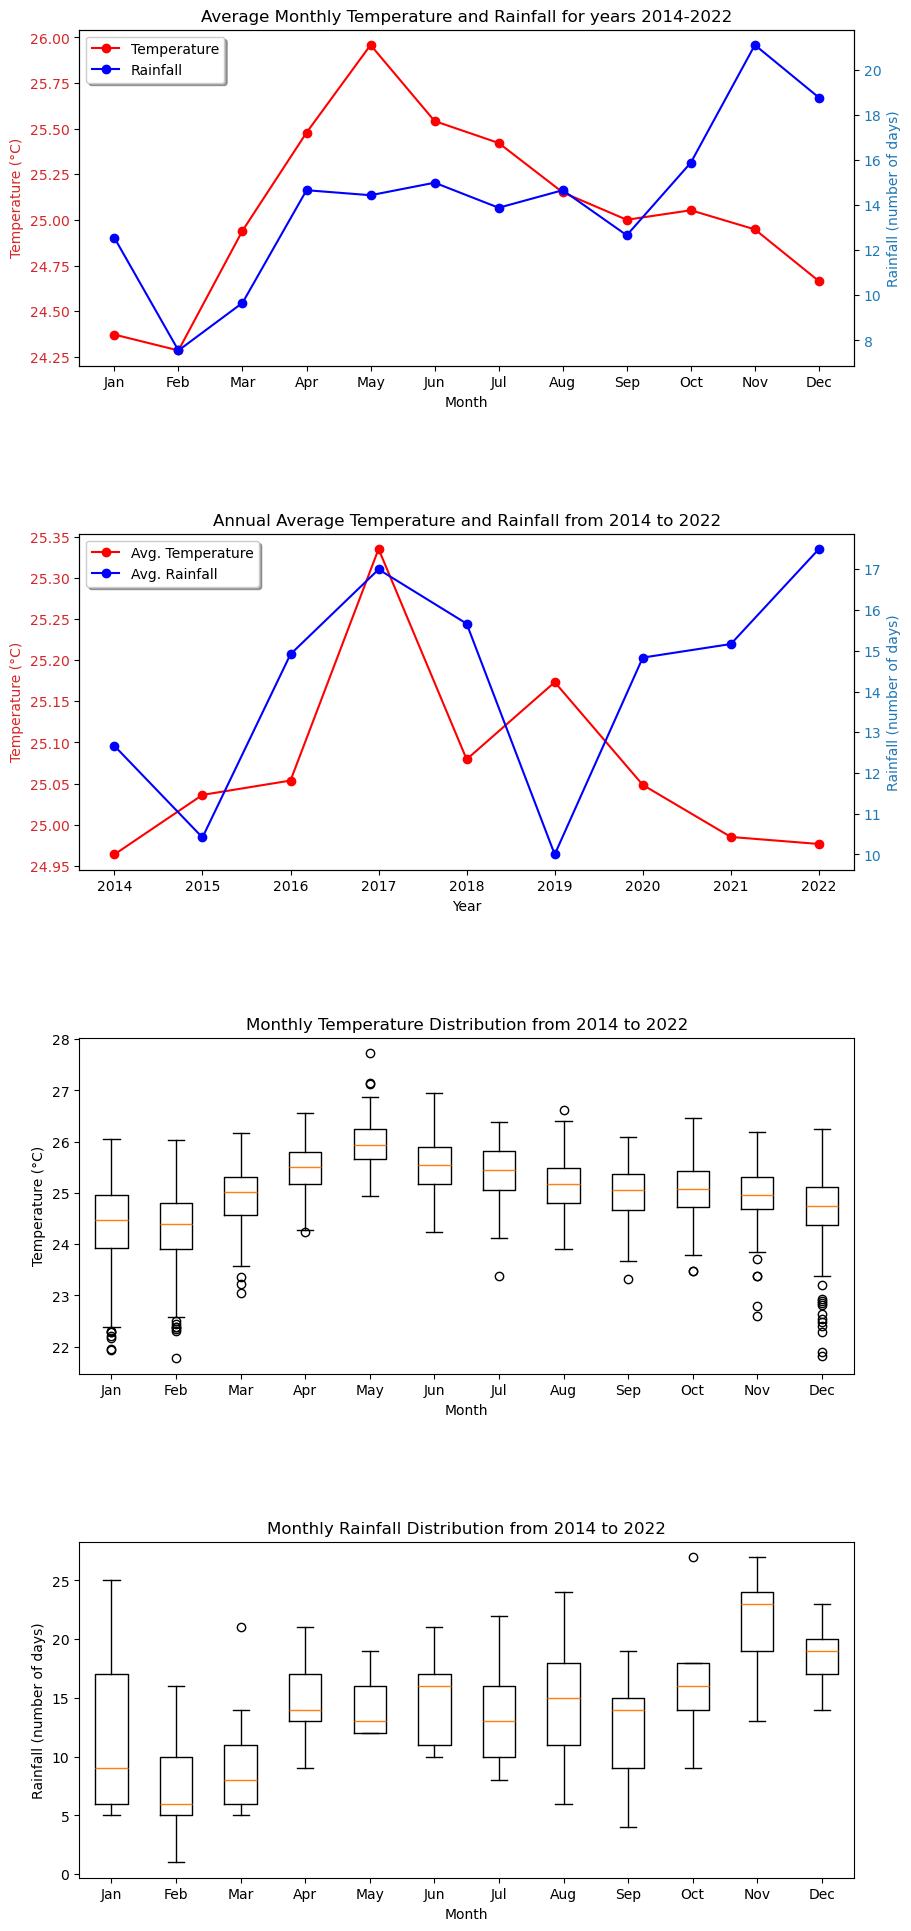

In [53]:
monthly_temperatures = {month: [] for month in range(1, 13)}
monthly_rainfall = {month: [] for month in range(1, 13)}
avg_temperatures = []
avg_rainfall = []

# Collect all temperatures and rainfall per month across all years
for record in wet_bulb_temperature:
    month = datetime.strptime(record['wbt_date'], '%Y-%m-%d').month
    monthly_temperatures[month].append(record['wet_bulb_temperature'])

for record in rainfall_monthly_number_of_rain_days:
    month = datetime.strptime(record['month'], '%Y-%m').month
    monthly_rainfall[month].append(record['no_of_rainy_days'])

# Aggregate data for each year
years = range(2014, 2023)
for y in years:
    yearly_temps = [record['wet_bulb_temperature'] for record in wet_bulb_temperature if datetime.strptime(record['wbt_date'], '%Y-%m-%d').year == y]
    yearly_rain = [record['no_of_rainy_days'] for record in rainfall_monthly_number_of_rain_days if datetime.strptime(record['month'], '%Y-%m').year == y]
    avg_temperatures.append(np.mean(yearly_temps) if yearly_temps else np.nan)
    avg_rainfall.append(np.mean(yearly_rain) if yearly_rain else np.nan)

# Convert lists to arrays for plotting
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot configuration
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 24), gridspec_kw={'hspace': 0.5})

# First plot: Line chart for average monthly temperatures and rainfall over the years
ax1, ax2, ax3, ax4 = axes
ax1.set_title('Average Monthly Temperature and Rainfall for years 2014-2022')
ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature (°C)', color='tab:red')
line1, = ax1.plot(month_labels, [np.mean(monthly_temperatures[m]) for m in range(1, 13)], 'ro-', label='Temperature')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax1b = ax1.twinx()
ax1b.set_ylabel('Rainfall (number of days)', color='tab:blue')
line2, = ax1b.plot(month_labels, [np.mean(monthly_rainfall[m]) for m in range(1, 13)], 'bo-', label='Rainfall')
ax1b.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend([line1, line2], ['Temperature', 'Rainfall'], loc='upper left', shadow=True)

# Second Plot for 2014-2022 Annual Averages
ax2.set_xlabel('Year')
ax2.set_ylabel('Temperature (°C)', color='tab:red')
line3, = ax2.plot(years, avg_temperatures, 'ro-', label='Avg. Temperature')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax2b = ax2.twinx()
ax2b.set_ylabel('Rainfall (number of days)', color='tab:blue')
line4, = ax2b.plot(years, avg_rainfall, 'bo-', label='Avg. Rainfall')
ax2b.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_title('Annual Average Temperature and Rainfall from 2014 to 2022')
ax2.legend([line3, line4], ['Avg. Temperature', 'Avg. Rainfall'], loc='upper left', shadow=True)


# Third plot: Box plot for temperatures
ax3.boxplot([monthly_temperatures[month] for month in range(1, 13)], labels=month_labels)
ax3.set_title('Monthly Temperature Distribution from 2014 to 2022')
ax3.set_ylabel('Temperature (°C)')
ax3.set_xlabel('Month')

# Fourth Box plot for rainfall
ax4.boxplot([monthly_rainfall[month] for month in range(1, 13)], labels=month_labels)
ax4.set_title('Monthly Rainfall Distribution from 2014 to 2022')
ax4.set_ylabel('Rainfall (number of days)')
ax4.set_xlabel('Month')



plt.show()



### Analyse for Average Monthly Temperature and Rainfall for years 2014-2022
1. **Rainfall Analysis:** Rainfall shows a distinct pattern with two significant peaks, one in November and another in December. These peaks suggest periods of high precipitation which could correspond to seasonal weather patterns, more rainfall count at the near end of the months, which starts increasing from september. The lowest rainfall occurs in February and March, indicating drier conditions during these months.

2. **Temperature Analysis:** Temperatures are generally lowest in February, with a noticeable increase leading up to May, where they peak. This peak represents the warmest month on average for year 2014-2022. After May, temperatures generally decrease all the way till december.

3. **Relationship Rainfall and Temperature Analysis:** An inverse relationship is observable in several months, most notably from May, November and December, where an increase in temperature corresponds with a decrease in rainfall. This inverse relationship could suggest that higher temperatures might be drying out the atmosphere, reducing precipitation during warmer months, and conversely, cooler months could be more conducive to rainfall.

### Analyse for Annual Average Temperature and rainfall from 2014-2022
1. **Rainfall Analysis:** The average number of rainy days varies significantly across the years. There is a notable peak in 2022, where the average number of rainy days is highest. The count of rain days is the lowest in year 2019 and a start increase till 2022.

2. **Temperature Analysis:** Over the period from 2014 to 2022, the average temperature shows minor changes over the years. The temperature is mainly stable but there is a notable rapidly increase in year 2017 where it reaches the highest temperature of around 25.34°C over the years from 2014-2022.

3. **Relationship Rainfall and Temperature Analysis:** As observed in the graph for years 2014-2022, there seems to be a general inverse relationship between temperature and rainfall. In years where the average temperature is lower, the rainfall count tends to be higher, which shows that more rainfall equals lower temperature. One signaficant example is from year 2019-2022, 2019 has a lower rainfall count with a higher temperature, the rainfall count consistenly increase from 2020-2022, the temperature also decrease over years 2020-2022.

### Analyse for Monthly Rainfall Distribution from 2014-2022
1. **Temperature range:** The box plot shows the range of temperatures for each month, with the box representing the interquartile range (IQR) and the whiskers indicating the minimum and maximum values.

2. **Seasonal variations:** There is a clear seasonal pattern, with higher temperatures observed during the middle months of years (Relatively high temperature from April-August) and lower temperatures during the months that is near the end or start of years (December, January, February).

3. **Outliers:** Some months have outliers, which are represented by individual dots above or below the whiskers. These outliers indicate unusually high or low temperatures for that particular month during the time period analyzed.

4. **Median temperatures:** The horizontal line within each box represents the median temperature for that month across the years analyzed.

5. **Variability:**  The box sizes provide an indication of the variability in temperatures for each month. Larger boxes suggest greater variability, while smaller boxes indicate less variability.

### Analyse for Monthly Rainfall Distribution from 2014-2022
1. **Range of rainfall:** The box plot shows the distribution of monthly rainfall amounts, with the box representing the interquartile range (IQR) and the whiskers indicating the minimum and maximum values observed during the study period.

2. **Seasonal patterns:** There appears to be a seasonal pattern in the rainfall distribution. Months like November, December, and January tend to have higher rainfall amounts, as indicated by the larger boxes and whiskers. In contrast, months like February, March, and April generally have lower rainfall levels.

3. **Outliers:** The plot shows several outliers, represented by individual dots above or below the whiskers. These outliers represent exceptionally high or low rainfall amounts for those particular months during the study period.

4. **Median rainfall:** The horizontal line within each box represents the median monthly rainfall amount for that particular month across the years analyzed.

5. **Variability:** The size of the boxes and the length of the whiskers provide an indication of the variability in rainfall for each month. Larger boxes and longer whiskers suggest higher variability, while smaller boxes and shorter whiskers indicate lower variability in rainfall amounts for that month.

6. **Wet months:** From the plot, it appears that the months of November, December, and January tend to experience higher rainfall amounts, as evidenced by the larger boxes and whiskers. These could be considered the wetter months of the year.

7. **Dry months:** On the other hand, months like February, March, and April generally have lower rainfall amounts, with smaller boxes and shorter whiskers, suggesting drier conditions during these months.



# Question 4: What are the yearly variations in air quality indicators, specifically the daily PSI and annual PM2.5 levels?

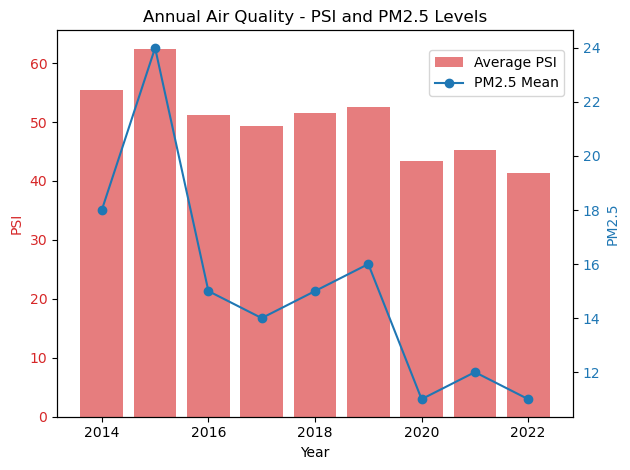

In [9]:
# Create a new column for year extraction from '24hr_psi' dates
years_in_24hr_psi = np.array([datetime.strptime(date, '%Y-%m-%d').year for date in historical_psi['24hr_psi']])

# Calculate daily average PSI across all regions
daily_avg_psi = np.mean([historical_psi['north'], historical_psi['south'], historical_psi['east'], historical_psi['west'], historical_psi['central']], axis=0)

# Create an array to aggregate yearly average PSI
years = range(2014, 2023)
annual_avg_psi = []

for year in years:
    # Mask to filter data for the current year
    year_mask = years_in_24hr_psi == year
    # Calculate the average PSI for this year using the mask
    if np.any(year_mask):
        annual_psi = np.mean(daily_avg_psi[year_mask])
    else:
        annual_psi = np.nan  # Handle years without data
    annual_avg_psi.append(annual_psi)

# Plotting
fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('PSI', color='tab:red')
ax1.bar(years, annual_avg_psi, color='tab:red', alpha=0.6, label='Average PSI')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_title('Annual Air Quality - PSI and PM2.5 Levels')

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
ax2.set_ylabel('PM2.5', color='tab:blue')
ax2.plot(air_pollutant_particulate_matter['year'], air_pollutant_particulate_matter['pm25_mean'], color='tab:blue', marker='o', label='PM2.5 Mean')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  # Otherwise the right y-label is slightly clipped
fig.legend(loc='upper right', bbox_to_anchor=(0.9,0.9))
plt.show()

Based on the graph showing the annual air quality data for PSI and PM2.5 levels, I can analyze the yearly variations as follows:

1. PSI (Pollutant Standards Index) levels:
- The PSI levels exhibit significant fluctuations over the years.
- There were two notable peaks in PSI values, one in 2016 and another in 2018, indicating periods of relatively poor air quality.
- The highest PSI value was observed in 2018, suggesting the most severe air pollution levels during that year.
- After the 2018 peak, PSI levels gradually declined but remained elevated compared to the earlier years.

2. PM2.5 (Particulate Matter 2.5) levels:
- The annual mean PM2.5 levels generally followed a similar trend as the PSI values, with some variations.
- Like the PSI, PM2.5 levels also peaked in 2018, indicating a concurrent period of high particulate matter pollution.
- After the 2018 peak, PM2.5 levels decreased but remained relatively high in the subsequent years.
- There is a noticeable dip in PM2.5 levels in 2020, which could potentially be attributed to reduced industrial and transportation activities during that period.

3. Relationship between PSI and PM2.5:
- The trends in PSI and PM2.5 levels show a positive correlation, suggesting that periods of high PSI values are often accompanied by elevated PM2.5 concentrations.
- However, there are some discrepancies between the two indicators, likely due to the different pollutants contributing to the PSI calculation.

4. Overall air quality trend:
- Based on both the PSI and PM2.5 data, the air quality appears to have deteriorated significantly in 2018, representing the worst year in terms of pollution levels during the studied period.
- While air quality improved after 2018, the levels of both indicators remained higher compared to the earlier years, indicating a persistent air pollution issue.

This analysis highlights the yearly variations in air quality, identifies periods of concern (such as the 2018 peak), and establishes a general trend of deteriorating air quality over the studied period, particularly in terms of PM2.5 levels. Further investigation into the potential causes and mitigation strategies may be warranted to address the observed air pollution issues.

# Question 5: Do variations in wet bulb temperature and monthly rainfall correlate with changes in air quality, particularly the daily PSI?


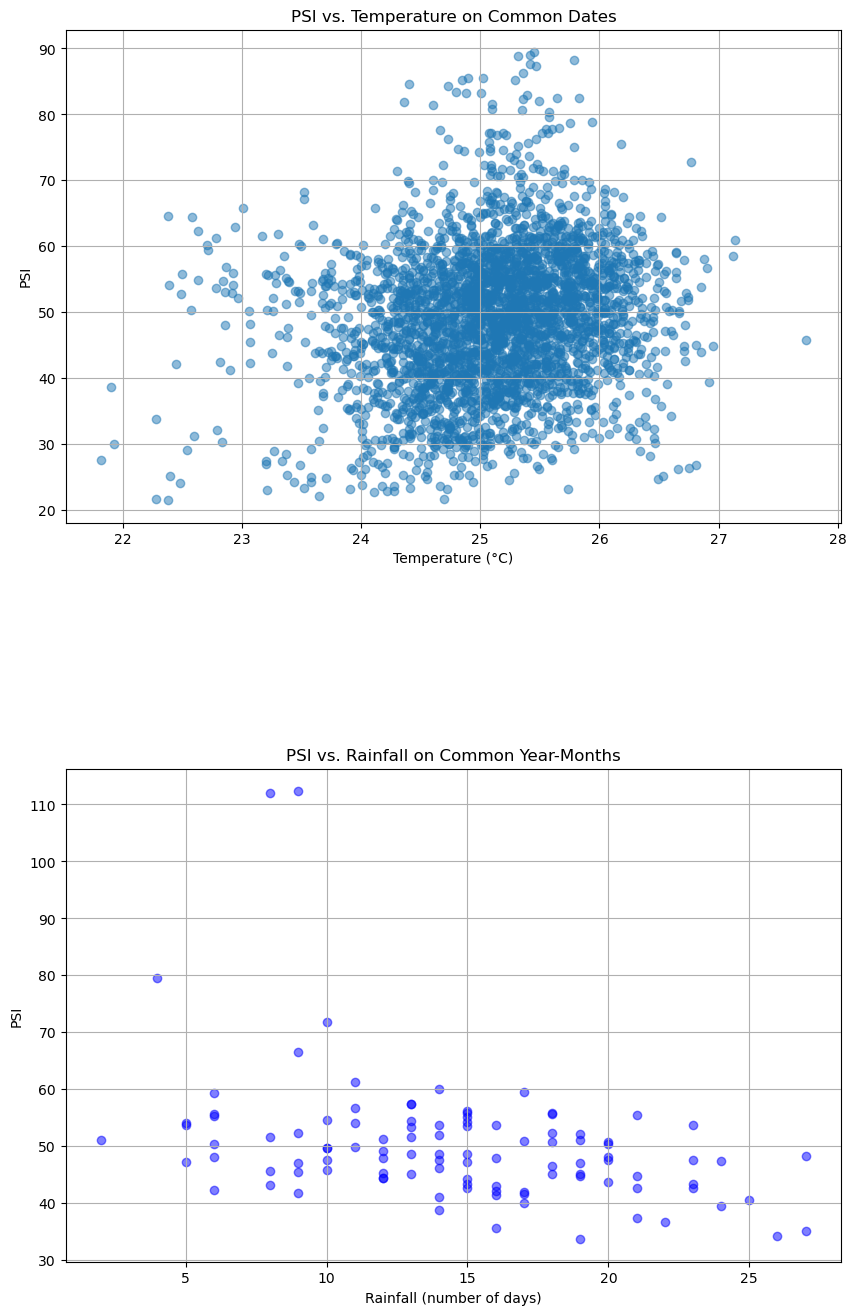

In [17]:
# Find the set of common dates in both historical_psi and wet_bulb_temperature (yyyy-mm-dd format)
common_dates = set(historical_psi['24hr_psi']) & set(wet_bulb_temperature['wbt_date'])

# Create lists to store common data points
psi_date_common = []
temp_date_common = []

# Iterate over common dates
for date in common_dates:
    # Get the index where the date matches in historical_psi
    psi_index = np.where(historical_psi['24hr_psi'] == date)[0][0]  # Access the first element since the date is unique since the start after cleaned
    # Calculate the daily average PSI for this index
    daily_avg_psi = np.mean([historical_psi['north'][psi_index],
                             historical_psi['south'][psi_index],
                             historical_psi['east'][psi_index],
                             historical_psi['west'][psi_index],
                             historical_psi['central'][psi_index]])
    
    # Get the index where the date matches in wet_bulb_temperature
    temp_index = np.where(wet_bulb_temperature['wbt_date'] == date)[0][0]  # Access the first element since the date is unique since the start after cleaned

    # Append daily average PSI and corresponding temperature to the lists
    psi_date_common.append(daily_avg_psi)
    temp_date_common.append(wet_bulb_temperature['wet_bulb_temperature'][temp_index])

# Convert lists to numpy arrays
psi_common = np.array(psi_date_common)
temp_common = np.array(temp_date_common)
# Filter out PSI values above 90 (outliers)
mask = psi_common <= 90
filtered_psi = psi_common[mask]
filtered_temp = temp_common[mask]

# Getting the common months for psi and rainfall data
# Aggregate PSI data by month
monthly_psi = {}
for record in historical_psi:
    month_key = datetime.strptime(record['24hr_psi'], '%Y-%m-%d').strftime('%Y-%m')
    psi_avg = np.mean([record['north'], record['south'], record['east'], record['west'], record['central']])
    if month_key in monthly_psi:
        monthly_psi[month_key].append(psi_avg)
    else:
        monthly_psi[month_key] = [psi_avg]

# Calculate average PSI per month
monthly_psi_avg = {month: np.mean(values) for month, values in monthly_psi.items()}

# Use existing rainfall data, assuming it's already in the correct format
monthly_rainfall_avg = {record['month']: record['no_of_rainy_days'] for record in rainfall_monthly_number_of_rain_days}

# Find common months across all datasets
common_months = set(monthly_psi_avg.keys()) & set(monthly_rainfall_avg.keys())

common_month_psi = np.array([monthly_psi_avg[month] for month in common_months])
common_month_rainfall = np.array([monthly_rainfall_avg[month] for month in common_months])

# Plotting
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 16), gridspec_kw={'hspace': 0.5})

# Plot for PSI vs Temperature
ax1.scatter(filtered_temp, filtered_psi, alpha=0.5)
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('PSI')
ax1.set_title('PSI vs. Temperature on Common Dates')
ax1.grid(True)

# Plot for PSI vs Rainfall
ax2.scatter(common_month_rainfall, common_month_psi, color='blue', alpha=0.5)
ax2.set_xlabel('Rainfall (number of days)')
ax2.set_ylabel('PSI')
ax2.set_title('PSI vs. Rainfall on Common Year-Months')
ax2.grid(True)



plt.show()

# Question 6: How do environmental factors specifically wet bulb temperature correlate with particulate matter (PM2.5) levels, and how does this relationship vary across different years?

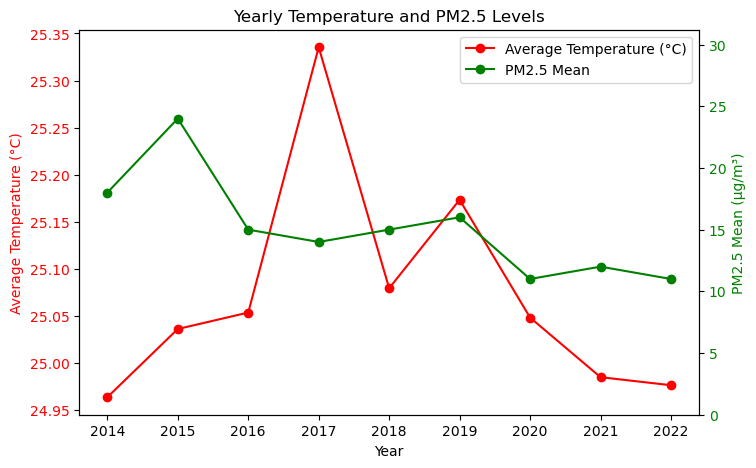

In [89]:
years = np.array([record['year'] for record in air_pollutant_particulate_matter])
pm25 = np.array([record['pm25_mean'] for record in air_pollutant_particulate_matter])
avg_temperatures = []  # List to hold average yearly temperatures

# Fill in average temperatures and rainfall based on your data collection logic
for y in years:
    yearly_temps = [record['wet_bulb_temperature'] for record in wet_bulb_temperature if datetime.strptime(record['wbt_date'], '%Y-%m-%d').year == y]
    avg_temperatures.append(np.mean(yearly_temps) if yearly_temps else np.nan)

# Plotting
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 5), gridspec_kw={'hspace': 0.5})

# Second subplot: Step Plot for Temperature and PM2.5 Levels
ax1.plot(years, avg_temperatures, color='red', marker='o', linestyle='-', label='Average Temperature (°C)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature (°C)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a twin axis for PM2.5 levels
ax1b = ax1.twinx()
ax1b.plot(years, pm25, color='green', marker='o', linestyle='-', label='PM2.5 Mean')
ax1b.set_ylabel('PM2.5 Mean (µg/m³)', color='green')
ax1b.tick_params(axis='y', labelcolor='green')
ax1b.set_ylim(0, max(pm25) * 1.3)  # Adjust scale for visibility

ax1.set_title('Yearly Temperature and PM2.5 Levels')
handles1, labels1 = ax1.get_legend_handles_labels()
handles1b, labels1b = ax1b.get_legend_handles_labels()
ax1.legend(handles1 + handles1b, labels1 + labels1b, loc='upper right')


plt.show()

# Question 7: Do heavy rainfall events lead to improvements in air quality due to pollutant washout, as observed in yearly data?

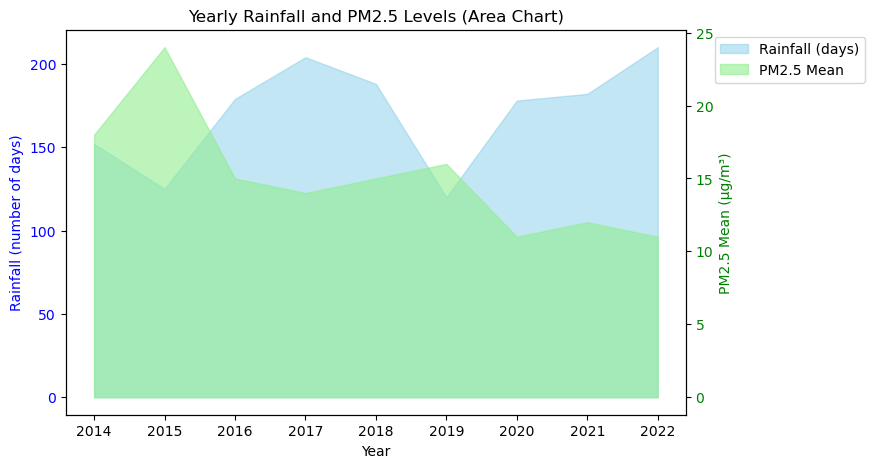

In [93]:
yearly_rainfall = []      # List to hold average yearly rainfall totals
years = np.array([record['year'] for record in air_pollutant_particulate_matter])
pm25 = np.array([record['pm25_mean'] for record in air_pollutant_particulate_matter])

# Fill in average temperatures and rainfall based on your data collection logic
for y in years:
    yearly_rain = [record['no_of_rainy_days'] for record in rainfall_monthly_number_of_rain_days if datetime.strptime(record['month'], '%Y-%m').year == y]
    yearly_rainfall.append(np.sum(yearly_rain) if yearly_rain else 0)  # Sum for total days of rainfall

# Plotting
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(8, 5), gridspec_kw={'hspace': 0.5})

# First subplot: Area Chart for Rainfall and PM2.5 Levels
ax1.fill_between(years, yearly_rainfall, color="skyblue", alpha=0.5, label='Rainfall (days)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Rainfall (number of days)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Overlay PM2.5 levels with a different y-axis
ax1b = ax1.twinx()
ax1b.fill_between(years, pm25, color="lightgreen", alpha=0.6, label='PM2.5 Mean')
ax1b.set_ylabel('PM2.5 Mean (µg/m³)', color='green')
ax1b.tick_params(axis='y', labelcolor='green')

ax1.set_title('Yearly Rainfall and PM2.5 Levels (Area Chart)')
handles1, labels1 = ax1.get_legend_handles_labels()
handles1b, labels1b = ax1b.get_legend_handles_labels()
ax1.legend(handles1 + handles1b, labels1 + labels1b, loc='upper right', bbox_to_anchor=(1.3,1.0))



# Question 8: How do air quality indices, particularly PSI, respond to rainfall and temperature change, is there any trend over the months throughout the years?

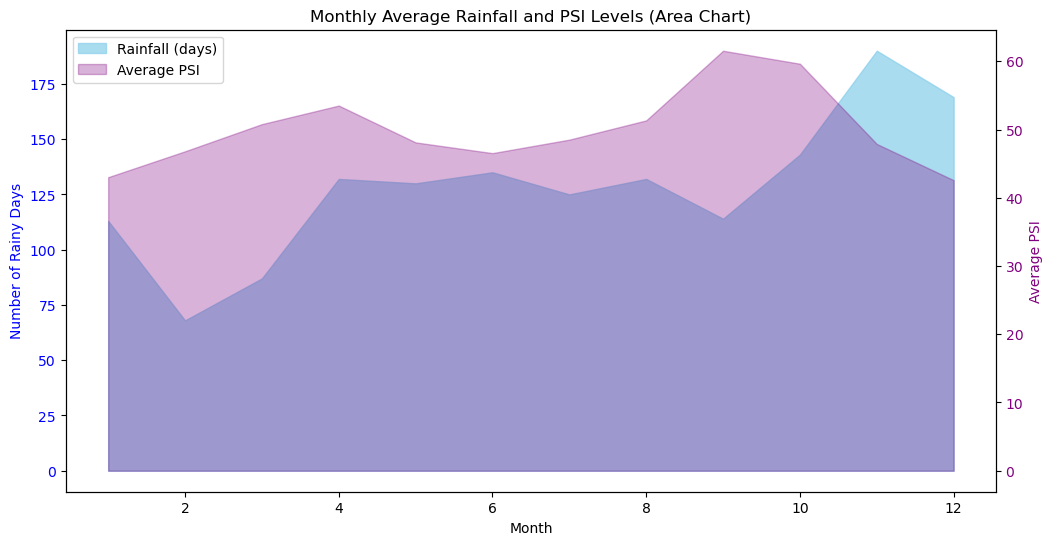

In [78]:
# Initialize arrays to store monthly averages
# Initialize arrays to store monthly averages
monthly_avg_psi = np.empty(12)
monthly_avg_psi[:] = np.nan  # Initialize with NaNs to handle possible missing data
monthly_avg_no_of_rain_days = np.empty(12)
monthly_avg_no_of_rain_days[:] = np.nan  # Initialize with NaNs to handle possible missing data

# Populate monthly averages
for i in range(1, 13):
    month_str = f'{i:02d}'
    
    # Create masks for rainfall and PSI data
    month_mask_rain = np.array([datetime.strptime(date, '%Y-%m').month == i for date in rainfall_monthly_number_of_rain_days['month']])
    month_mask_psi = np.array([datetime.strptime(date, '%Y-%m-%d').month == i for date in historical_psi['24hr_psi']])
    
    # Get the number of rainy days for the current month
    month_no_of_rain_days = rainfall_monthly_number_of_rain_days['no_of_rainy_days'][month_mask_rain]
    
    # Calculate the daily average PSI for the current month
    daily_psis = np.mean([
        historical_psi['north'][month_mask_psi],
        historical_psi['south'][month_mask_psi],
        historical_psi['east'][month_mask_psi],
        historical_psi['west'][month_mask_psi],
        historical_psi['central'][month_mask_psi]
    ], axis=0)
    
    # Store the monthly average number of rainy days
    if month_no_of_rain_days.size > 0:
        monthly_avg_no_of_rain_days[i-1] = np.sum(month_no_of_rain_days)
    
    # Store the monthly average PSI
    if daily_psis.size > 0:
        monthly_avg_psi[i-1] = np.mean(daily_psis)

# Create a month array for plotting
months = np.arange(1, 13)

# Plotting the monthly average PSI and number of rainy days
fig, ax1 = plt.subplots(figsize=(12, 6))

# Area chart for Rainfall
ax1.fill_between(months, monthly_avg_no_of_rain_days, color="skyblue", alpha=0.7, label='Rainfall (days)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Rainy Days', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Overlay PSI levels with a different y-axis
ax1b = ax1.twinx()
ax1b.fill_between(months, monthly_avg_psi, color="purple", alpha=0.3, label='Average PSI')
ax1b.set_ylabel('Average PSI', color='purple')
ax1b.tick_params(axis='y', labelcolor='purple')

ax1.set_title('Monthly Average Rainfall and PSI Levels (Area Chart)')
handles1, labels1 = ax1.get_legend_handles_labels()
handles1b, labels1b = ax1b.get_legend_handles_labels()
ax1.legend(handles1 + handles1b, labels1 + labels1b, loc='upper left')

plt.show()